In [1]:
# The code was removed by Watson Studio for sharing.

# The Spatial Configuration of Guesthouse and Hostel in Bangkok, Thailand

##### This project is the part of capstone project in the "Coursera IBM Data Science Professional specialization".

##### By Ty Wattana

## 1. Introduction

Bangkok is one of the top tourist destination cities in the world. In 2019, it was ranked to be the 1st world’s most-visited cities surpassing Paris and London with 22.78 million visitors. The city offers the tourist many historical and cultural sights to see, dynamic nightlife shopping and relaxation. However local experience travel is one of five travel trends for 2020, the travelers want to find authentic experiences. Many travelers prefer privacy and a comfortable way of renting their own accommodations in private apartments or houses. The hostel is the new trend of accommodation for travelers who desire simple accommodation and local experience during their stay and also in order to avoid crowded places and the tourist masses. Thus guesthouse and hostel promotion policy is essential for building a new tourism infrastructure to capture this new trend of tourism and also important for the local economy.

This project aims to explore the neighborhood around the hostels in Bangkok and cluster them according to the venues surrounded by. The venues close to them indicate how hostels take advantage of their neighborhood and how travelers choose their local accommodation. For example, the cluster with the highest number of hostels may have a lot of goods and services venue category in their area while the other cluster with fewer hostels may have a few in their area. In this case, this data insight can indicate that food venues are essential for establishing local accommodation. City planners or policymakers can use this analysis to design guesthouse promotion policy as well as local accommodation entrepreneurs to find the optimal location for  their business.

## 2. Data Section

This project utilizes Foursquare , a location technology platform focusing on tourism and city guild , to perform analysis since it is an opensource platform having the data necessary for this project.  However Foursquare has some limitations because most venues in this platform are  in food shop and service categories which can lead to a bias in the result. Therefore any future research may use Google place, Yalp or administrative data combine with Foursquare to have a better comprehensive and unbiased analysis.

The neccesary data sets for this analysis consist of 
1. List of hostel in Bangkok and their geographical coordinates 
2. List of venue types surrounding each Hostels in 1000 metres radius. The 1000 metres radius was chosen because it is a reasonable walking distance.


## 3. Methodology

The methodology is divided into three major sections namely Data collection, Hostel cluster, and Result Visualization. 

In the data collection section, A list of hostels in Bangkok and a list of venue types surrounding each hostel in 1000 meters radius are gathered from Foursquare API using requests python library. In order to gather most of the hostels in Bangkok, the request library is used to gather hostels data around the center of each district in a 3000 meters radius. This data gathering method can cover most of the areas in Bangkok. Thus gathering geographical coordinates of each center of Bangkok's districts is the prerequisite for the hostel's data gathering process. The list of districts of Bangkok's data frame form Wikipedia is the proper data source for this prerequisite process since python can gather this data very efficiently using a read_html library from the pandas.io.html package and this data is somewhat reliable for the purpose. Although, there are some districts that geographical coordinates of their center are missing therefor geocoder library is used to automatically find those missing data. After hostel data is in place, the nearby venue's data in 1000 meters of each hostel is collected by the same method used to collect hostel's data around the center of each district. All the data that is necessary for the later analysis are organized and preprocessed in the pandas data frame. Details and coding of each step are in the result section.

In the clustering section, each hostel is assigned into the cluster using the KMean method base on their nearby venue categories within a 1000 meters radius. The distance used to calculate for the KMean method is defined as average dummy encoding which has a value between 0 and 1 for each dimension or venue category. For example, Hostel_1 may have 1 noodle house from all 10 venue categories nearby in 1000 meters radius. This means Hostel_1 has 0.1 distances far from the full existence of the noodle house. In other words, Hostel_1 has a location of 0.1 on the noodle house dimension. Moreover, KMean method requires one to determine the number of centroids before the calculation. Thus, the elbow method is used to determine the optimal number of centroids for this analysis. The KMean clustering in this project performs by KMeans library from sklearn.cluster python package. 

Another important process is data visualization. The main purpose of visualization is to get a better understand of the analysis. In this clustering analysis, visualization is used to illustrate how algorithms cluster all hostels in Bangkok. The tool for this purpose is the folium library which is the python library for visualization of geographical information. In addition, the pie charts and graph plot are also used for various analyses in this project as well by mainly utilizing matplotlib python package. Note that, this visualization process is not separated into the stand-alone part of the analysis but infiltrate it both data collection and hostel clustering process.

## 4. Result

### 4.1 Data Collection

The data collection process starts with the process of gathering all Bangkok district data from Wikipedia and geocoder package. The result in Table 1 shows the name of all 50 districts with the geographical coordinate of their center point. All hostels that locate near each center points in a 3000 meters radius will be gathered as discussed in the methodology section. Figure 1 illustrates the area that the data gathering process is cover. Note that in some large districts, Nong Chok for example, the 3000 meters radius is too small to cover most of its area. The reason why this occurs is that the area size data for each district is not currently in place. Thus future research, when the data is in place, should set the radius for data collection according to the size of each district in order to cover most of the area possible.

#### Import necesary libraries

In [2]:
!conda install -c conda-forge geocoder
!conda install -c conda-forge folium
import pandas as pd
import numpy as np
from pandas.io.html import read_html
import folium
import geocoder
from geopy.geocoders import Nominatim
import requests
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



#### Get the list of hostel in Bangkok

##### Seting up for Foursquare

In [3]:
# The code was removed by Watson Studio for sharing.

Client ID and Client secret have set


In [4]:
# Get Bangkok geographical coordinate for later used
address = "Bangkok, TH"

geolocator = Nominatim(user_agent= "B_explorer") # Identify user agent for deocoder
location = geolocator.geocode(address) # pick the location

# Assign geographical coordinate to variables

B_latitude = location.latitude
B_longitude = location.longitude

print('The geograpical coordinate of Bangkok are {}, {}.'.format(B_latitude, B_longitude))

The geograpical coordinate of Bangkok are 13.7538929, 100.8160803.


##### Get all Bangkok districts data

In [5]:
#read wikipedia table using read_html library
page = 'https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok'
B_districs = read_html(page, attrs= {'class':'wikitable'}) # Assign result to a variable 
print('Extract {} wikitable'.format(len(B_districs))) # 

Extract 1 wikitable


In [6]:
# Take a look
B_districs = B_districs[0]
B_districs.head()

,District(Khet),Code,Thai,Population,No. ofSubdistricts(Khwaeng),Latitude,Longitude
0,Bang Bon,50,บางบอน,105161,4,NaN,NaN
1,Bang Kapi,6,บางกะปิ,148465,2,13.765833,100.647778
2,Bang Khae,40,บางแค,191781,4,13.696111,100.409444
3,Bang Khen,5,บางเขน,189539,2,13.873889,100.596389
4,Bang Kho Laem,31,บางคอแหลม,94956,3,13.693333,100.502500


##### Data preprocessing

In [7]:
B_districs.rename(columns= {"District(Khet)":"District"}, inplace= True) #Rename District column to contain only english name
B_districs.drop(["Code","Thai","No. ofSubdistricts(Khwaeng)","Population"], axis= 1, inplace= True) #Drop unnecessary columns

B_districs.head()

,District,Latitude,Longitude
0,Bang Bon,NaN,NaN
1,Bang Kapi,13.765833,100.647778
2,Bang Khae,13.696111,100.409444
3,Bang Khen,13.873889,100.596389
4,Bang Kho Laem,13.693333,100.502500


#### Get missing geographical coordinate data using Geocoder

In [8]:
for index, dis in zip(list(B_districs.index.values), B_districs["District"]): #loop through the table
    try: # set try-except clause to avoid some districts that geocoder cannot find the data
        # Geocoder data gathering process
        address = dis+", Bangkok, TH"
        geolocator = Nominatim(user_agent= "B_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude

        B_districs["Latitude"][index] = latitude
        B_districs["Longitude"][index] = longitude
    except: pass

B_districs

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,District,Latitude,Longitude
0,Bang Bon,13.666503,100.428859
1,Bang Kapi,13.778482,100.640875
2,Bang Khae,13.711932,100.422308
3,Bang Khen,13.846971,100.560648
4,Bang Kho Laem,13.693208,100.502427
5,Bang Khun Thian,13.602660,100.423803
6,Bang Na,13.668108,100.604614
7,Bang Phlat,13.793913,100.504772
8,Bang Rak,13.727354,100.527037
9,Bang Sue,13.802668,100.540281


#### Add geographical coordinate manually for a district that doesn't have information

## Table 1: list of all Bangkok district and its geographical coordinate

In [9]:
# There are one district that coordinate data is missing so let's assign it manually
B_districs["Latitude"][19] = 13.8271
B_districs["Longitude"][19] = 100.6743

B_districs

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,District,Latitude,Longitude
0,Bang Bon,13.666503,100.428859
1,Bang Kapi,13.778482,100.640875
2,Bang Khae,13.711932,100.422308
3,Bang Khen,13.846971,100.560648
4,Bang Kho Laem,13.693208,100.502427
5,Bang Khun Thian,13.602660,100.423803
6,Bang Na,13.668108,100.604614
7,Bang Phlat,13.793913,100.504772
8,Bang Rak,13.727354,100.527037
9,Bang Sue,13.802668,100.540281


In [10]:
# The code was removed by Watson Studio for sharing.

{'file_name': 'Bangkok Districts.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'capstoneproject-donotdelete-pr-r4yccdlgkakr9f',
 'asset_id': '83722c5f-e744-4dac-adcd-fc7864f46ea1'}

### Figure 1: Map of area that will be gathered hostels data

In [11]:
# visualize the area that will be gathered data
map = folium.Map(location=[B_latitude, B_longitude], zoom_start=10) # Create a folium map of Bangkok and assign the result to the variable map 

# loop through the B_districs to add markers of each district and add radius of data gathering
for dist, lat, lng in zip(B_districs["District"], B_districs["Latitude"], B_districs["Longitude"]):
    folium.Marker([lat, lng], popup= dist).add_to(map) # add marker with district's name popup
    folium.Circle([lat, lng], radius=3000).add_to(map) # add data gathering radius

    
map

All hostels that locate near each center points in a 3000 meters radius will be gathered as discussed in the methodology section. Figure 1 illustrates the area that the data gathering process is cover. Note that in some large districts, Nong Chok for example, the 3000 meters radius is too small to cover most of its area. The reason why this occurs is that the area size data for each district is not currently in place. Thus future research, when the data is in place, should set the radius for data collection according to the size of each district in order to cover most of the area possible.

### Get list of Hostels

In [12]:
local_acc_list = [] # create global empty list to store data  
special_dist_list = [] # create another list to find some districts with different data format 
radius = 3000 # assign radius for data gathering

# loop Foursquare API requests through Bangkok districts to get hostels data   
for dist, lat, lng in zip(B_districs["District"], B_districs["Latitude"], B_districs["Longitude"]):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
        CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, "hostel", radius, LIMIT) # set url for requests
    
    local_acc = requests.get(url).json() # requests the data and assign it to variable local_acc
    try: #Set try-except to avoid data set with diffencet format
        local_acc = local_acc['response']['venues']
        local_acc_list.append([(L['name'],
                                L['location']['lat'],
                                L['location']['lng']) for L in local_acc])
        
    except:
        special_dist_list.append(dist) # Get the name of districts that have different data format
        
  
local_acc_df = pd.DataFrame([item for local_acc_list in local_acc_list for item in local_acc_list]) # create a data frame from local_acc list
local_acc_df.columns = ['Name', 'Latitude', 'Longitude'] # Assign columns name
local_acc_df.drop_duplicates(inplace= True) # Drop duplicate data

# See the result
print(local_acc_df.shape)
local_acc_df.head()

(408, 3)


,Name,Latitude,Longitude
0,Spinning Bear Hostel,13.780055,100.646339
1,Bangkok Center Hostel,13.758757,100.628782
2,Aimyish's hostel,13.714505,100.442049
3,Galato Coffee Hostel,13.851448,100.554353
4,P24 Hostel,13.837932,100.575459


In [13]:
# See if there any districts have a differnt data format
special_dist_list

['Ratchathewi']

#### Fortunately, there are no district with different data format

### Figure 2: Map of Hostels in Bangkok

After collecting all hostels near each district center in a 3000 meters radius using Foursquare API, The 412 hostels are gathered and figure 2 displays each location of the hostels. Most of the hostel concentrate in the center of Bangkok namely in Yan Nawa, Samphanthawong, Ratchathewi and etc. Moreover, nearby venues of each hostel in 1000 meters radius are also being collected for the purpose clustering process. More than 30,000 venue's data are collected using the same methodology for hostel data collection.

In [14]:
# visualize the result
hostel_map = folium.Map(location=[B_latitude, B_longitude], zoom_start=10) # Create a folium map of Bangkok and assign the result to the variable hostel_map
#Add marker for each hostels using for loop

for name, lat, lng in zip(local_acc_df["Name"], local_acc_df["Latitude"], local_acc_df["Longitude"]):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=name,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(hostel_map)
    
hostel_map

### Explore near by venues around each hostels

In [15]:
venues_list = [] # create global empty list to store data
special_hostels_list = [] # create another list to find some venues_list with different data format
radius = 1000 # assign radius for data gathering

for hostel, lat, lng in zip(local_acc_df["Name"], local_acc_df["Latitude"], local_acc_df["Longitude"]):
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        radius, 
        LIMIT)
    
    venues = requests.get(url).json() # Request data
    
    #Get only relevent data
    #Pass some venues that has different data format
    try:
        venues = venues['response']["groups"][0]['items']
        venues_list.append([(hostel,
                             lat, 
                             lng,
                             V['venue']['name'],
                             V['venue']['location']['lat'],
                             V['venue']['location']['lng'], 
                             V['venue']['categories'][0]['name']) for V in venues])
    except:
        continue

nearby_venues_df = pd.DataFrame([item for venues_list in venues_list for item in venues_list]) # create a data frame from venues_list
nearby_venues_df.columns = ['Hostel', 'Hostel Latitude', 'Hostel Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'] # Assign columns name

print(nearby_venues_df.shape)
nearby_venues_df.head()

(36757, 7)


,Hostel,Hostel Latitude,Hostel Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Spinning Bear Hostel,13.780055,100.646339,ข้าวซอยล้านนา,13.781328,100.642640,Thai Restaurant
1,Spinning Bear Hostel,13.780055,100.646339,ตี๋เตี๋ยวยำ (ก๋วยเตี๋ยวหมูต้มยำ),13.779177,100.648819,Noodle House
2,Spinning Bear Hostel,13.780055,100.646339,Khlong Chan Botanical Park (สวนพฤกษชาติคลองจั่น),13.777568,100.647554,Botanical Garden
3,Spinning Bear Hostel,13.780055,100.646339,Ko Boo Rod Sing (โกบู๊รสซิ่ง),13.774971,100.648642,Noodle House
4,Spinning Bear Hostel,13.780055,100.646339,ราชาบะหมี่เกี๊ยว,13.781514,100.641264,Noodle House


In [16]:
# The code was removed by Watson Studio for sharing.

{'file_name': 'Nearby Venues.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'capstoneproject-donotdelete-pr-r4yccdlgkakr9f',
 'asset_id': 'e0b0105b-52ac-41ae-8374-3e9a9985eb5c'}

### 4.2 Hostels Clustering

This process involves three major steps. The first step is the dummy encoding. There are 311 nearby venue categories collecting from the previous section which means every hostel must have 311 dummy variables indicate whether that hostel have such venue categories in their nearby area in 1000 meters radius away or not. Each dummy variable will be calculated in an average of total nearby venues for each hostel as discussed before in the methodology section. In the second process, all dummy variables are used to determine the optimal K in the elbow method. Figure 3 shows the result of the elbow method which is the iteration process of KMean clustering using former dummies as input through K = 1 to k = 20. The result suggests that k = 4 is the point where the distortion of KMean most drastically drops (Elbow point). This means k = 4 is the optimal k for this analysis. Thereafter in the last section, all hostels are assigned into four clusters (k = 4) namely Cluster 0, Cluster 1, Cluster 2 and Cluster 3 using the KMean method. 

#### Encode dummy variables for each nearby venues of each hostels

In [17]:
Hostel_onehot = pd.get_dummies(nearby_venues_df[['Venue Category']], prefix="", prefix_sep="") # Dummy encoding

# add hostel column to new dummy dataframe
Hostel_onehot['Hostel'] = nearby_venues_df['Hostel'] 

# move hostel column to the first column
Hostel_onehot.set_index("Hostel", inplace= True)
Hostel_onehot.reset_index(inplace= True)
Hostel_onehot.head()

,Hostel,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Zoo,Zoo Exhibit
0,Spinning Bear Hostel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Spinning Bear Hostel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spinning Bear Hostel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Spinning Bear Hostel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Spinning Bear Hostel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Groupby hostels using mean operation to get average distance value for each hostels. 

In [18]:
#Group by Hostel with mean operation
Hostel_grouped = Hostel_onehot.groupby('Hostel').mean().reset_index()
Hostel_grouped.head()

,Hostel,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Zoo,Zoo Exhibit
0,'Go!' Bangkok Hostel,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,168 Hostel,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1819 Hostel,0.012821,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1989 Cafe & Hostel Bangkok,0.012658,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1989 Hostel & Cafe,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cluster the hostels using Kmean method

### Figure 3: The Elbow Method ressult

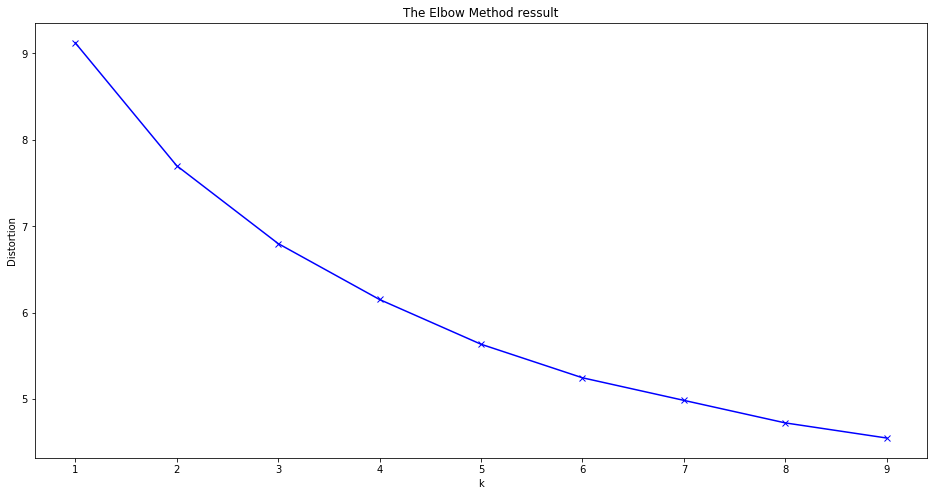

In [19]:
#Iterate the Kmean clustering
distortions = [] # Create empty list to store KMean distortion data from each k
K = range(1,10) # Define range of k for Iteration process  

Hostel_clustering = Hostel_grouped.drop('Hostel', 1)

#loop KMean clustering through k = range(1,10) and append distortion to distortion list 
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(Hostel_clustering)
    distortions.append(kmeanModel.inertia_)

#Plot the result to find elbow point

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method ressult')
plt.show()

### It seems that k = 4 is an optimal k even it's not very obvious 

### Kmean clustering k = 4

In [20]:
# Define number of cluster
kclusters = 4

kmeanModel = KMeans(n_clusters=kclusters, random_state=0).fit(Hostel_clustering) # KMean clustering using Hostel_clustering data

# check cluster labels generated for each row in the dataframe
kmeanModel.labels_[0:10]

array([2, 0, 3, 3, 2, 2, 2, 2, 0, 0], dtype=int32)

## Assign Cluster to each hostel

### Preprocessing data

In [21]:
# Assign cluster back in data frame

Hostel_venue_cat = Hostel_onehot.groupby('Hostel').sum().reset_index() # Create new data frame that sum up all venues around each hostel for later analysis
Hostel_venue_cat.insert(1, "Cluster Labels", kmeanModel.labels_) # Insert cluster to new data frame

Hostel_venue_cat.head()

,Hostel,Cluster Labels,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Zoo,Zoo Exhibit
0,'Go!' Bangkok Hostel,2,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,168 Hostel,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1819 Hostel,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1989 Cafe & Hostel Bangkok,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1989 Hostel & Cafe,2,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [22]:
#Get lat lng of each Hostels for later mapping
Hostel_df = nearby_venues_df.drop(["Venue", "Venue Latitude", "Venue Longitude", "Venue Category"], axis= 1, )
Hostel_df.drop_duplicates(inplace= True)

#Merge the data frames
Hostel_Merged = pd.merge(Hostel_df, Hostel_venue_cat, on="Hostel")

Hostel_Merged.head()

,Hostel,Hostel Latitude,Hostel Longitude,Cluster Labels,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,...,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Zoo,Zoo Exhibit
0,Spinning Bear Hostel,13.780055,100.646339,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bangkok Center Hostel,13.758757,100.628782,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Aimyish's hostel,13.714505,100.442049,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Galato Coffee Hostel,13.851448,100.554353,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,P24 Hostel,13.837932,100.575459,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Figure 4: Map of hostels cluster

In [23]:
# Create a Bangkok folium map
cluster_map = folium.Map(location=[B_latitude, B_longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, hostel, cluster in zip(Hostel_Merged['Hostel Latitude'], Hostel_Merged['Hostel Longitude'], Hostel_Merged['Hostel'], Hostel_Merged['Cluster Labels']):
    label = folium.Popup(str(hostel) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(cluster_map)


cluster_map

Figure 4 shows the result of the clustering process. Hostels in Cluster 2 (blue dot) located in the center of Bangkok and most of them located near the BTS sky train system. Hostels in Cluster 0 (red dot) and Cluster 3 (green dot) locate around Cluster 2 area. Hostels in Cluster 0 mostly located in the westside of the center of Bangkok while hostels in Cluster 3 mostly located in the eastside. Many of these hostels in and Cluster 3 located near the international airports and remote BTS sky train stations. Cluster 1 (purple dot), on the other hand, unique from other clusters in that hostel in this cluster concentrate in the relatively small area. This area is one of the famous tourist attractions in Bangkok called "Kho san" road where tourists can find any kind of experience from the Thai temple to night bar. Thus it is reasonable for many entrepreneurs to settle their hostel business in this area and create such a unique hostel cluster.

### 4.3 Result visualization

The result as shown in figure 5 shows that most of the hostels are fall into cluster 2 with a proportion of 41.9% from total hostels. Cluster 0 is the second cluster with the most percentage of hostels which is 22.5% from the total. Cluster 3 and Cluster 1 share a very similar proportion of hostels in the percentage of 19.4% and 16.2% respectively.

### Figure 5: Proportion of cluster assigned

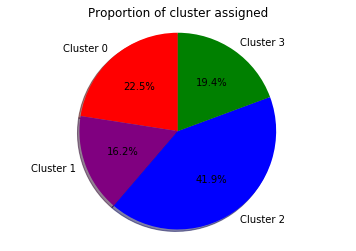

In [24]:
# Create pie chart to visualize the proportion of clusters

labels = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"] # Assign labels for each cluster
sizes = Hostel_Merged["Cluster Labels"].value_counts(sort = False) # Set sizes input for pie chart

fig1, ax1 = plt.subplots() # Create figure object
ax1.pie(sizes, labels=labels, colors= ['red', 'purple', 'blue', 'green'], autopct='%1.1f%%',shadow=True, startangle=90) # Create pie chart with colors respect to the map
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Proportion of cluster assigned") # Set title
plt.show()

Each cluster has a different characteristic in terms of its surrounding venues. Cluster 0 has the noodle house as it most common venues followed by Thai restaurants, coffee shops, hotel and other kinds of the restaurant as shown in Figure 6. Cluster 2 is the opposite of Cluster 0. The hotel is the most common venue in this cluster while Thai restaurants and other kinds of restaurants fall behind as shown in Figure 7. Cluster 3 has a very similar characteristic to Cluster 0 but it has the convenience store as its top-most common venues and also has the coffee shop as its second top most common venues. Cluster 1 has a unique characteristic in that it has a bar as it top-most common venue followed by the Thai restaurants, hotel and other kinds of restaurant.

## Analyze Characteristic of the Clusters

### Preprocessing Data

In [25]:
#Get cluster charater table

cluster_char = Hostel_Merged.drop(['Hostel', 'Hostel Latitude', 'Hostel Longitude'], axis= 1) # create new data frame using some columns in Hostel_Merged data frame 
cluster_char = cluster_char.groupby("Cluster Labels").sum().reset_index() # Group by cluster using sum operation to get the number of each venues categories in each cluster

#Add "Cluster" text to each cluster number
cluster_char['Cluster Labels'] = 'Cluster ' + cluster_char['Cluster Labels'].astype(str)
cluster_char.head()

,Cluster Labels,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yakitori Restaurant,Yoga Studio,Yoshoku Restaurant,Zoo,Zoo Exhibit
0,Cluster 0,10.0,0.0,2.0,0.0,0.0,1.0,1.0,6.0,4.0,...,0.0,14.0,11.0,1.0,8.0,0.0,6.0,0.0,0.0,0.0
1,Cluster 1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,26.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Cluster 2,5.0,5.0,10.0,0.0,15.0,15.0,0.0,10.0,1.0,...,1.0,50.0,51.0,0.0,18.0,13.0,79.0,34.0,0.0,1.0
3,Cluster 3,7.0,15.0,22.0,1.0,51.0,62.0,5.0,0.0,1.0,...,3.0,1.0,3.0,0.0,3.0,0.0,1.0,0.0,3.0,0.0


In [26]:
#Transpose data frame for pie chart
cluster_char.set_index("Cluster Labels", inplace= True)
cluster_char = cluster_char.transpose()
cluster_char.head()

Cluster Labels,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Accessories Store,10.0,0.0,5.0,7.0
Airport,0.0,0.0,5.0,15.0
Airport Food Court,2.0,0.0,10.0,22.0
Airport Gate,0.0,0.0,0.0,1.0
Airport Lounge,0.0,0.0,15.0,51.0


In [27]:
# Get only top 10 common venue for each cluster

#Cluster0
Cluster0_top10 = cluster_char["Cluster 0"].to_frame()
Cluster0_top10.sort_values(by=['Cluster 0'], ascending=False, inplace= True) #Sort values for most common venues
Cluster0_top10 = Cluster0_top10[:10] # Get only first ten most common venues
Cluster0_top10.reset_index(inplace = True) # reset index
Cluster0_top10.rename(columns= {"index": "Venues"},inplace= True) # Give a name to venue column

#Cluster1
Cluster1_top10 = cluster_char["Cluster 1"].to_frame()
Cluster1_top10.sort_values(by=['Cluster 1'], ascending=False, inplace= True)
Cluster1_top10 = Cluster1_top10[:10]
Cluster1_top10.reset_index(inplace = True)
Cluster1_top10.rename(columns= {"index": "Venues"},inplace= True)

#Cluster2 
Cluster2_top10 = cluster_char["Cluster 2"].to_frame()
Cluster2_top10.sort_values(by=['Cluster 2'], ascending=False, inplace= True)
Cluster2_top10 = Cluster2_top10[:10]
Cluster2_top10.reset_index(inplace = True)
Cluster2_top10.rename(columns= {"index": "Venues"},inplace= True)

#Cluster3
Cluster3_top10 = cluster_char["Cluster 3"].to_frame()
Cluster3_top10.sort_values(by=['Cluster 3'], ascending=False, inplace= True)
Cluster3_top10 = Cluster3_top10[:10]
Cluster3_top10.reset_index(inplace = True)
Cluster3_top10.rename(columns= {"index": "Venues"},inplace= True)

In [28]:
#Take a look at Cluster 0 top 10 common venues
Cluster0_top10

,Venues,Cluster 0
0,Noodle House,1032.0
1,Thai Restaurant,732.0
2,Coffee Shop,570.0
3,Café,521.0
4,Hotel,342.0
5,Chinese Restaurant,324.0
6,Asian Restaurant,322.0
7,Convenience Store,284.0
8,Dessert Shop,244.0
9,Bar,233.0


### Visualize the result

#### Define the function that create the bar chart

In [29]:
#Define the bar chart function
def bar_chart(df, cluster, color):
    ax = df.plot.bar(x= "Venues", y=cluster, rot=0, figsize = (25,10), color=color) # Create bar chart for top 10 common venues
    ax.set_title("Top 10 venues in {}".format(cluster))

#### Figure 6: Top 10 common venues in cluster 0

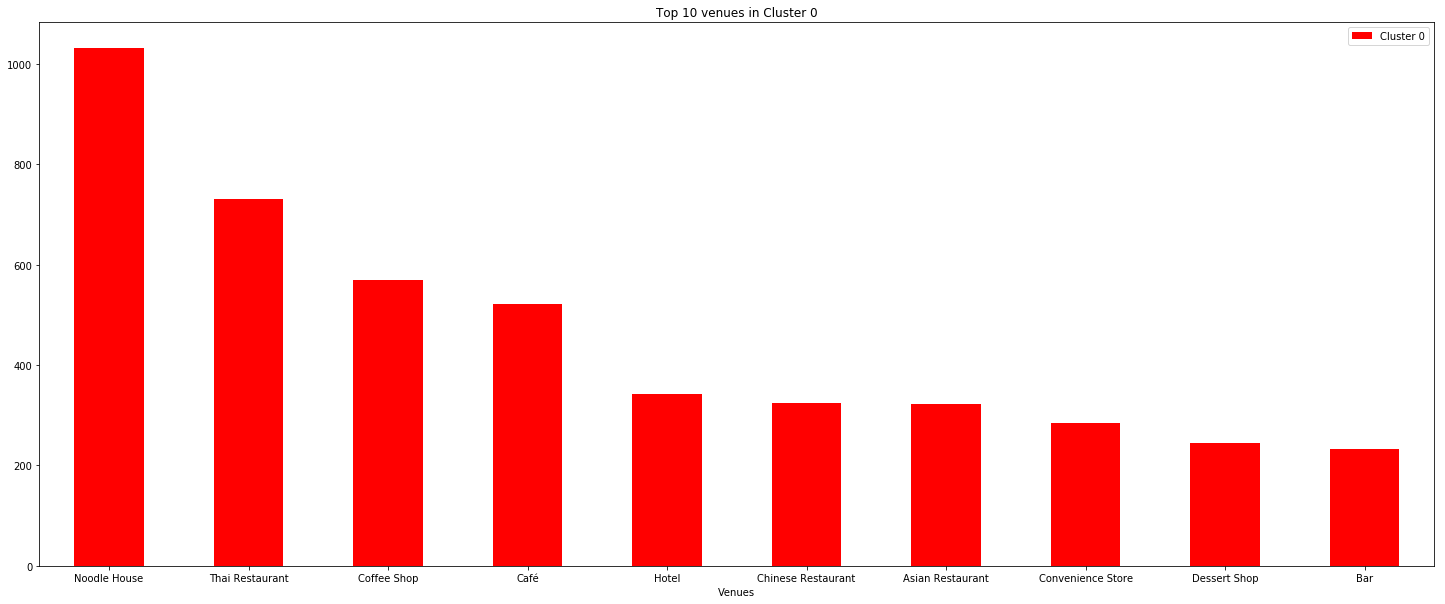

In [30]:
bar_chart(df=Cluster0_top10, cluster='Cluster 0', color= 'r')

#### Figure 7: Top 10 common venues in cluster 1

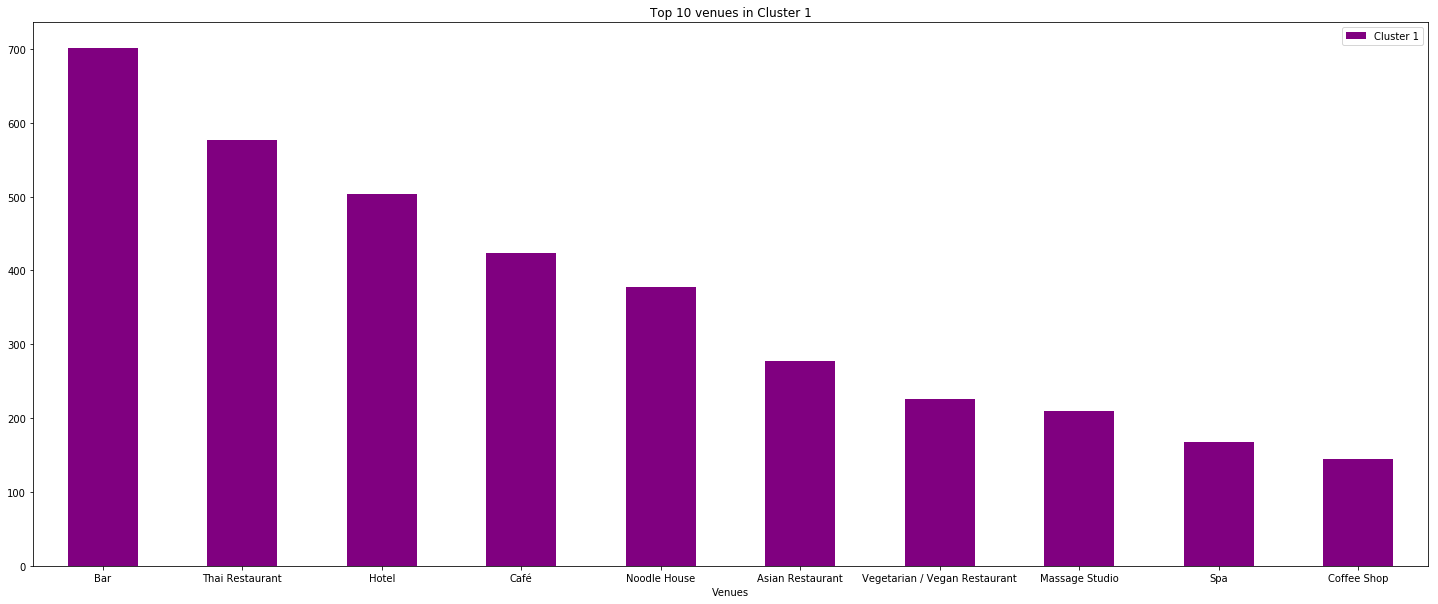

In [31]:
bar_chart(df=Cluster1_top10, cluster='Cluster 1', color= 'purple')

#### Figure 8: Top 5 common venues in cluster 2

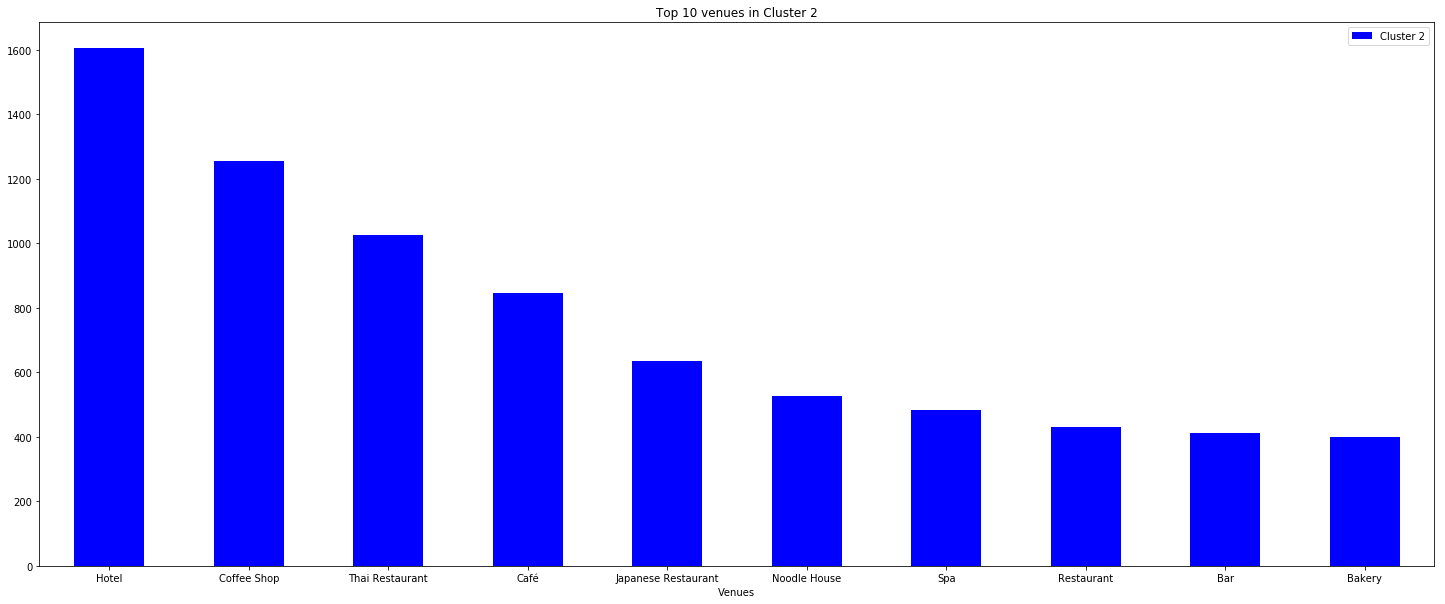

In [32]:
bar_chart(df=Cluster2_top10, cluster='Cluster 2', color= 'b')

#### Figure 9: Top 5 common venues in cluster 3

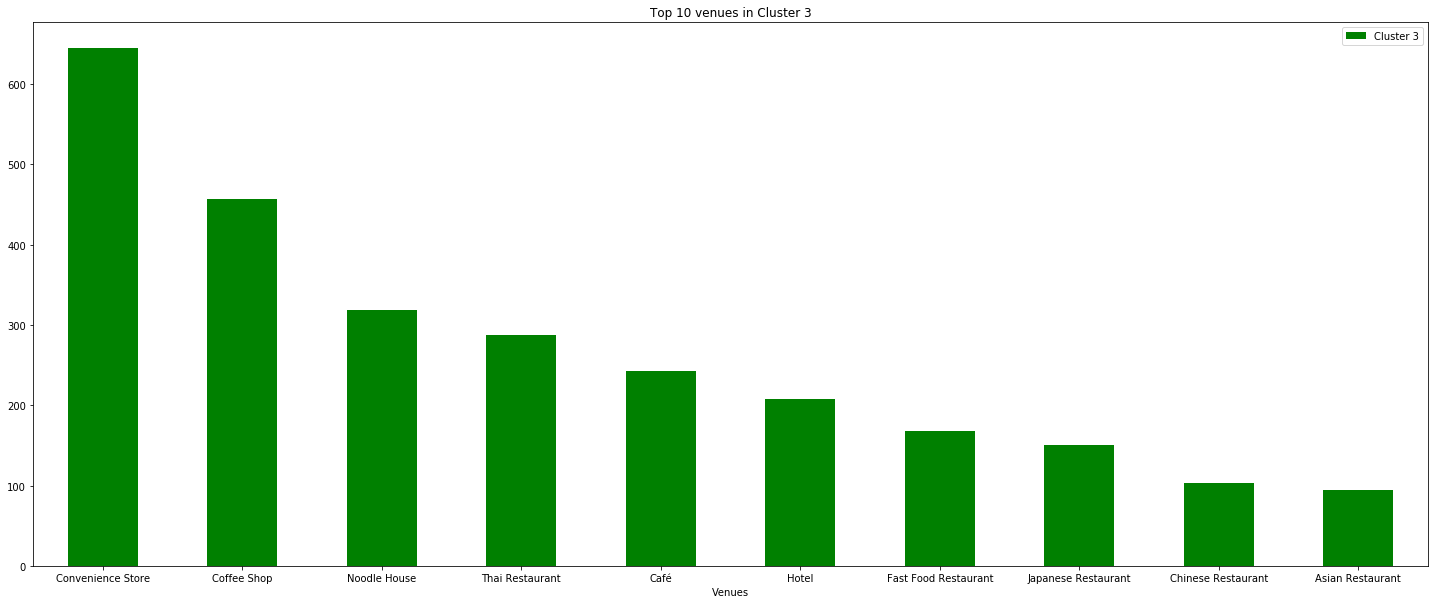

In [33]:
bar_chart(df=Cluster3_top10, cluster='Cluster 3', color= 'g')

## 5. Discussion

According to the result in the above section, it seems that food venues such as Thai restaurant, noodles house, coffee shop and etc. as well as bar and hotel have a significant role as a good environment for hostel business in Bangkok since it appears to be the most common venues in every cluster. Although the bar is the most important venue in Cluster 1 while the hotel plays a vital role in Cluster 2. 

The finding that the hostel and hotel co-exist in every cluster is very interesting and somewhat counter-intuitive since the hostel might want to locate away from the hotel to avoid competition. There are several explanations for this occurrence.

Firstly, both hostels and hotels are a very similar business so they take similar advantages over similar locations, as a result, hostel and hotel coexist in the same location. 

Secondly, it is possible that hotels contribute to the growth of nearby businesses such as Thai restaurants, noodle house, coffee shop, bar and etc. and these nearby businesses are essential for the hostels. Therefore this led the hostel entrepreneurs to set their business near the hotel to gain common advantage. 

Thirdly, the hostel and hotel might not be a direct business competitor because they have different target customers. The main target customers of the hotel are high purchasing power tourists who prefer comfortable accommodations and convenient services while hostel serves travelers who prefer simple accomodation and want to enjoy the local experience. Thus both hostel and hotel can exploit their location advantage without having to significantly compete with one another.

Fourthly, the hostel and hotel may, indeed, compete over some potential tourist locations. This led them to settle down their business as near those locations as possible. The result is both the hostel and hotel are operate near each other.

Nevertheless Figure 4 shows very interesting findging that the configuration of many hostels take advantage of infrastructures such as Skytrain and international airports. Thus, we can assume that these infrastructures are also important factors for hostel business even though there are in the outer area of Bangkok.

## 6. Limitation and Suggestion for future research

This research has two major limitations for more consideration and improvement  including 
1. Foursquare limitation: As mentioned above, Foursquare is a location technology platform focusing on tourism and has a majority of venue data of food shop and service venue categories. This can lead to bias on the result of this research. Future research should utilize multiple data sources such as Google place, Yalp or administrative data combine with Foursquare to overcome this limitation.
2. Methodology limitation: This research has limitations in both the data gathering and the clustering process. In the data gathering process, as shown in Figure 1, hostels in 3,000 meters radius away from the centers of each district in Bangkok are gathered. This method has left some major areas in some districts unexplored. In order to overcome this limitation , future research has to apply the different methods , for example , by adjusting the radius according to each district's size. 
    In the clustering process, the KMean clustering algorithm treats every venue equally even some venues are much more important than the others ,for example, one ice cream shop and one BTS Skytrain station are equally important for the KMean algorithm. 
    
    
  In order to have a better understanding of the configuration of hostels in Bangkok, the future researcher has to design the methodology concerning thes limitations. 